# In this example, we try Naive Bayes model.

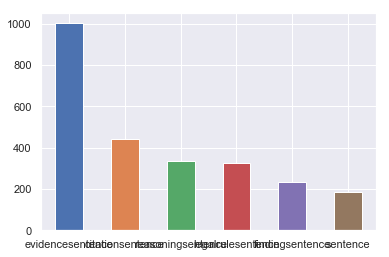

value of c: 1
accuracy: 0.7233201581027668
value of c: 10
accuracy: 0.7233201581027668
value of c: 50
accuracy: 0.7233201581027668
value of c: 100
accuracy: 0.7233201581027668
value of c: 1000
accuracy: 0.7233201581027668
value of c: 2000
accuracy: 0.7233201581027668
                   precision    recall  f1-score   support

 citationsentence       0.77      0.98      0.86        87
 evidencesentence       0.70      0.97      0.81       210
  findingsentence       0.64      0.55      0.59        33
legalrulesentence       0.86      0.62      0.72        58
reasoningsentence       0.74      0.28      0.41        81
         sentence       1.00      0.03      0.05        37

      avg / total       0.75      0.73      0.67       506

Actual             citationsentence  evidencesentence  findingsentence  legalrulesentence  reasoningsentence  sentence  All
Predicted                                                                                                                  
citations

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def clean_text(text):
    '''lower text, remove punctuation, numbers, extra spaces, and stop words'''
    text = text.lower()
    text = re.sub(r'[\.:;,()\']', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join(word for word in text.split()
                    if word not in stopwords.words('english'))
    return text


# Read in csv from directory
df = pd.read_csv("PTSD_claims_data.csv")


# Apply clean text function from above to do some simple preprocessing
df['sentences'] = df['sentences'].apply(clean_text)
df['rhetrole'] = df['rhetrole'].apply(clean_text)


# Uncomment to show bar chart of rhetorical roles
ax = df['rhetrole'].value_counts().plot(kind='bar', rot=0)
plt.show()


# Let X define the predictors and y define the labels
X = df['sentences']
y = df['rhetrole']


# Split data into training, validation, and test sets ()
#what is the test_size = .20 comming from???
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  # test size ==??
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.125)

# Running logistic regression model using several values for the
# regularizer (which is C)
C_vals = [1, 10, 50, 100, 1000, 2000]
acc = 0
#log_reg = 0
bayes_ = 0
for c in C_vals:
    print(f'value of c: {c}')

    bayes = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf', BernoulliNB())# MultinomialNB())
                       
                       ])

    # First you train the model using fit, then you predict
    bayes.fit(X_train, y_train)
    y_pred = bayes.predict(X_val) #compare and with predictied values
    accuracy = accuracy_score(y_val, y_pred)
    #train it for the 1st value of c
    

    # This conditional looks for the C_val that has the highest accuracy
    # on the validation set and uses it for the final prediction below
    if accuracy > acc:  #if this one better then save it
        acc = accuracy
        #log_reg = logreg
        bayes_ = bayes

    print(f"accuracy: {accuracy}")


# The final prediction on the testing set using the C val from above
y_pred = bayes.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)


# Print the classsifcation report (preicsion, recall, etc)
# and the confusion_matrix
print(classification_report(y_test, y_pred,
                            target_names=unique_labels(y_test)))
print(pd.crosstab(y_pred, y_test,
                  colnames=['Actual'],
                  rownames=['Predicted'],
                  margins=True).to_string())



# This is for linear SVM model

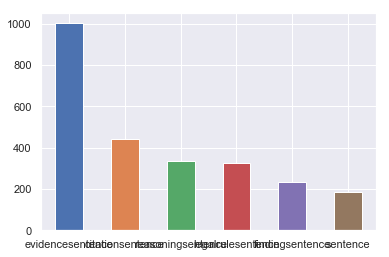

value of c: 1


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...coda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\runpy.py in _run_code(code=<code object <module> at 0x000001B5BA68A4B0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Anh\Downloads\Anacoda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...coda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...coda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001B5BA68A4B0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Anh\Downloads\Anacoda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...coda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(884, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(884, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (884, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=884, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 7, 29, 1, 58, 16, 639939, tzinfo=tzutc()), 'msg_id': 'ec45e23971574ee9be7a8d0c33f2e9c2', 'msg_type': 'execute_request', 'session': 'e2cd26d0b53245c98ad2380613e4cfe7', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ec45e23971574ee9be7a8d0c33f2e9c2', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'e2cd26d0b53245c98ad2380613e4cfe7']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 7, 29, 1, 58, 16, 639939, tzinfo=tzutc()), 'msg_id': 'ec45e23971574ee9be7a8d0c33f2e9c2', 'msg_type': 'execute_request', 'session': 'e2cd26d0b53245c98ad2380613e4cfe7', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ec45e23971574ee9be7a8d0c33f2e9c2', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'e2cd26d0b53245c98ad2380613e4cfe7'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 7, 29, 1, 58, 16, 639939, tzinfo=tzutc()), 'msg_id': 'ec45e23971574ee9be7a8d0c33f2e9c2', 'msg_type': 'execute_request', 'session': 'e2cd26d0b53245c98ad2380613e4cfe7', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ec45e23971574ee9be7a8d0c33f2e9c2', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="import pandas as pd\nimport matplotlib.pyplot as ...'],\n                  margins=True).to_string())\n", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.Import object>, <_ast.Import object>, <_ast.Import object>, <_ast.Import object>, <_ast.Expr object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.FunctionDef object>, <_ast.Assign object>, <_ast.Assign object>, ...], cell_name='<ipython-input-2-1316bb685682>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1b5c27392b0, executio...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001B5C26D5DB0, file "<ipython-input-2-1316bb685682>", line 66>
        result = <ExecutionResult object at 1b5c27392b0, executio...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001B5C26D5DB0, file "<ipython-input-2-1316bb685682>", line 66>, result=<ExecutionResult object at 1b5c27392b0, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001B5C26D5DB0, file "<ipython-input-2-1316bb685682>", line 66>
        self.user_global_ns = {'C_vals': [1, 0.1, 0.02, 0.01, 0.001, 0.0005], 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nimport matplotlib.pyplot as ...d'],\n                  margins=True).to_string())", "import pandas as pd\nimport matplotlib.pyplot as ...d'],\n                  margins=True).to_string())"], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, ...}
        self.user_ns = {'C_vals': [1, 0.1, 0.02, 0.01, 0.001, 0.0005], 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nimport matplotlib.pyplot as ...d'],\n                  margins=True).to_string())", "import pandas as pd\nimport matplotlib.pyplot as ...d'],\n                  margins=True).to_string())"], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\Anh\PycharmProjects\OR568-Legal-Semantic-Modeling\<ipython-input-2-1316bb685682> in <module>()
     84 
     85                         
     86 
     87       
     88     # First you train the model using fit, then you predict
---> 89     svm.fit(X_train, y_train)
     90     y_pred = svm.predict(X_val) #compare and with predictied values
     91     accuracy = accuracy_score(y_val, y_pred)
     92     #train it for the 1st value of c
     93     

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...ain_score='warn',
       scoring=None, verbose=0), X=1044    respect va examiner stated difference ve...fact
Name: sentences, Length: 1767, dtype: object, y=1044     evidencesentence
1413    legalrulesente...tence
Name: rhetrole, Length: 1767, dtype: object, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X = 1044    respect va examiner stated difference ve...fact
Name: sentences, Length: 1767, dtype: object
        y = 1044     evidencesentence
1413    legalrulesente...tence
Name: rhetrole, Length: 1767, dtype: object
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Jul 28 21:58:38 2020
PID: 4996           Python 3.7.0: C:\Users\Anh\Downloads\Anacoda\python.exe
...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))]), 1044    respect va examiner stated difference ve...fact
Name: sentences, Length: 1767, dtype: object, 1044     evidencesentence
1413    legalrulesente...tence
Name: rhetrole, Length: 1767, dtype: object, {'score': <function _passthrough_scorer>}, array([ 146,  150,  153, ..., 1764, 1765, 1766]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...    179, 180, 181, 182, 183, 184, 188, 191, 192]), 0, {'svc__C': 1, 'svc__gamma': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))]), 1044    respect va examiner stated difference ve...fact
Name: sentences, Length: 1767, dtype: object, 1044     evidencesentence
1413    legalrulesente...tence
Name: rhetrole, Length: 1767, dtype: object, {'score': <function _passthrough_scorer>}, array([ 146,  150,  153, ..., 1764, 1765, 1766]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...    179, 180, 181, 182, 183, 184, 188, 191, 192]), 0, {'svc__C': 1, 'svc__gamma': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))]), X=1044    respect va examiner stated difference ve...fact
Name: sentences, Length: 1767, dtype: object, y=1044     evidencesentence
1413    legalrulesente...tence
Name: rhetrole, Length: 1767, dtype: object, scorer={'score': <function _passthrough_scorer>}, train=array([ 146,  150,  153, ..., 1764, 1765, 1766]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...    179, 180, 181, 182, 183, 184, 188, 191, 192]), verbose=0, parameters={'svc__C': 1, 'svc__gamma': 1}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...andom_state=None, tol=0.0001,
     verbose=0))])>
        parameters = {'svc__C': 1, 'svc__gamma': 1}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))]), **kwargs={'svc__C': 1, 'svc__gamma': 1})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...andom_state=None, tol=0.0001,
     verbose=0))])>
        kwargs = {'svc__C': 1, 'svc__gamma': 1}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\utils\metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))]), attr='steps', **params={'svc__C': 1, 'svc__gamma': 1})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...andom_state=None, tol=0.0001,
     verbose=0))])>
        params = {'svc__C': 1, 'svc__gamma': 1}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\base.py in set_params(self=Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))]), **params={'svc__C': 1, 'svc__gamma': 1})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'svc'
        self = Pipeline(memory=None,
     steps=[('scaler', Sta...random_state=None, tol=0.0001,
     verbose=0))])
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter svc for estimator Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns; sns.set()
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def clean_text(text):
    '''lower text, remove punctuation, numbers, extra spaces, and stop words'''
    text = text.lower()
    text = re.sub(r'[\.:;,()\']', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join(word for word in text.split()
                    if word not in stopwords.words('english'))
    return text


# Read in csv from directory
df = pd.read_csv("PTSD_claims_data.csv")


# Apply clean text function from above to do some simple preprocessing
df['sentences'] = df['sentences'].apply(clean_text)
df['rhetrole'] = df['rhetrole'].apply(clean_text)


# Uncomment to show bar chart of rhetorical roles
ax = df['rhetrole'].value_counts().plot(kind='bar', rot=0)
plt.show()


# Let X define the predictors and y define the labels
X = df['sentences']
y = df['rhetrole']


# Split data into training, validation, and test sets ()
#what is the test_size = .20 comming from???
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  # test size ==??
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.125)

# Running logistic regression model using several values for the
# regularizer (which is C)

    
C_vals = [1, 1/10, 1/50, 1/100, 1/1000, 1/2000]
gammas = C_vals
cv = StratifiedShuffleSplit(n_splits=5)
cv=10
acc=0
for c in C_vals:
    print(f'value of c: {c}')
    pipe = Pipeline([('scaler', StandardScaler()), 
                        ('clf', LinearSVC())])
    param_grid= dict(svc__gamma=gammas, svc__C=C_vals)
    svm = GridSearchCV(pipe, n_jobs=-1,param_grid=param_grid,cv=cv)

        # The pipeline vectorizes the sentences, transforms it to TD-IDF values,
    # and runs the model
#     svm = Pipeline([('vect', CountVectorizer()),
#                        ('tfidf', TfidfTransformer()),
#                        ('clf', SVC(kernel='linear',
#                                    decision_function_shape=None,
#                                    shrinking=True,
#                                    random_state= None,
#                                    solver='sag',
#                                    multi_class='multinomial',
#                                    max_iter=-1))

                        

      
    # First you train the model using fit, then you predict
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_val) #compare and with predictied values
    accuracy = accuracy_score(y_val, y_pred)
    #train it for the 1st value of c
    

    # This conditional looks for the C_val that has the highest accuracy
    # on the validation set and uses it for the final prediction below
    if accuracy > acc:  #if this one better then save it
        acc = accuracy
        #log_reg = logreg
        #bayes_ = bayes
        pipe = svm

    print(f"accuracy: {accuracy}")


# The final prediction on the testing set using the C val from above
y_pred = svm.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)


# Print the classsifcation report (preicsion, recall, etc)
# and the confusion_matrix
print(classification_report(y_test, y_pred,
                            target_names=unique_labels(y_test)))
print(pd.crosstab(y_pred, y_test,
                  colnames=['Actual'],
                  rownames=['Predicted'],
                  margins=True).to_string())


# This islogistic  regression model

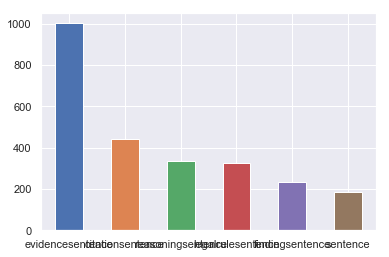

value of c: 1
accuracy: 0.766798418972332
value of c: 10
accuracy: 0.841897233201581
value of c: 50
accuracy: 0.8221343873517787
value of c: 100
accuracy: 0.8181818181818182
value of c: 1000
accuracy: 0.8142292490118577
value of c: 2000
accuracy: 0.8063241106719368
                   precision    recall  f1-score   support

 citationsentence       0.89      0.99      0.94        82
 evidencesentence       0.86      0.88      0.87       194
  findingsentence       0.66      0.74      0.70        47
legalrulesentence       0.82      0.68      0.74        74
reasoningsentence       0.55      0.55      0.55        64
         sentence       0.72      0.62      0.67        45

      avg / total       0.79      0.79      0.79       506

Actual             citationsentence  evidencesentence  findingsentence  legalrulesentence  reasoningsentence  sentence  All
Predicted                                                                                                                  
citationsen

C:\Users\Anh\Downloads\Anacoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def clean_text(text):
    '''lower text, remove punctuation, numbers, extra spaces, and stop words'''
    text = text.lower()
    text = re.sub(r'[\.:;,()\']', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join(word for word in text.split()
                    if word not in stopwords.words('english'))
    return text


# Read in csv from directory
df = pd.read_csv("PTSD_claims_data.csv")


# Apply clean text function from above to do some simple preprocessing
df['sentences'] = df['sentences'].apply(clean_text)
df['rhetrole'] = df['rhetrole'].apply(clean_text)


# Uncomment to show bar chart of rhetorical roles
ax = df['rhetrole'].value_counts().plot(kind='bar', rot=0)
plt.show()


# Let X define the predictors and y define the labels
X = df['sentences']
y = df['rhetrole']


# Split data into training, validation, and test sets ()
#what is the test_size = .20 comming from???
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  # test size ==??
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.125)

# Running logistic regression model using several values for the
# regularizer (which is C)
C_vals = [1, 10, 50, 100, 1000, 2000]
acc = 0
log_reg = 0
for c in C_vals:
    print(f'value of c: {c}')
    # The pipeline vectorizes the sentences, transforms it to TD-IDF values,
    # and runs the model
    logreg = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf', LogisticRegression(n_jobs=1,
                                                  C=c,
                                                  solver='sag',
                                                  multi_class='multinomial',
                                                  max_iter=1000))
                       ])
    # First you train the model using fit, then you predict
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_val) #compare and with predictied values
    accuracy = accuracy_score(y_val, y_pred)
    #train it for the 1st value of c
    

    # This conditional looks for the C_val that has the highest accuracy
    # on the validation set and uses it for the final prediction below
    if accuracy > acc:  #if this one better then save it
        acc = accuracy
        log_reg = logreg

    print(f"accuracy: {accuracy}")


# The final prediction on the testing set using the C val from above
y_pred = logreg.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)


# Print the classsifcation report (preicsion, recall, etc)
# and the confusion_matrix
print(classification_report(y_test, y_pred,
                            target_names=unique_labels(y_test)))
print(pd.crosstab(y_pred, y_test,
                  colnames=['Actual'],
                  rownames=['Predicted'],
                  margins=True).to_string())



NameError: name 'svm_inst' is not defined